<a href="https://colab.research.google.com/github/MichalWilk45/MichalWilk45/blob/main/ML%20-%20intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
oecd_bli = pd.read_csv("/gdrive/My Drive/oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [5]:
oecd_bli.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)
oecd_bli["Satysfakcja z życia"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Satysfakcja z życia, dtype: float64

In [7]:
gdp_per_capita = pd.read_csv("/gdrive/My Drive/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "PKB per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [23]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="PKB per capita", inplace=True)
full_country_stats[['PKB per capita', 'Satysfakcja z życia']].sort_values(by=['Satysfakcja z życia'], ascending=False)

,PKB per capita,Satysfakcja z życia
Country,,
Switzerland,80675.308,7.5
Denmark,52114.165,7.5
Iceland,50854.583,7.5
Israel,35343.336,7.4
Norway,74822.106,7.4
Finland,41973.988,7.4
New Zealand,37044.891,7.3
Australia,50961.865,7.3
Netherlands,43603.115,7.3


In [9]:
full_country_stats[["PKB per capita", 'Satysfakcja z życia']].loc["Poland"]

PKB per capita         12495.334
Satysfakcja z życia        5.800
Name: Poland, dtype: float64

In [24]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]   # operujemy tylko na części danych 
keep_indices = list(set(range(36)) - set(remove_indices))


sample_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[keep_indices]
missing_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[remove_indices]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


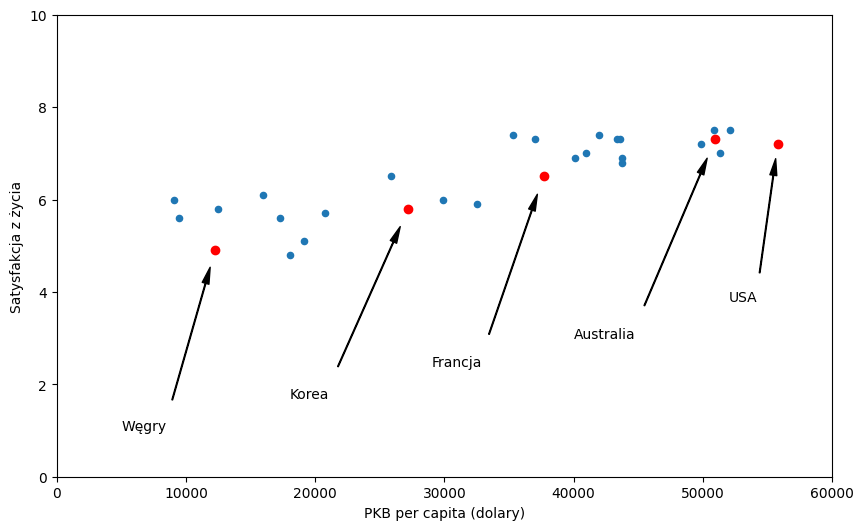

In [25]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "USA" if country == "United States" else country
    country = "Węgry" if country == "Hungary" else country
    country = "Francja" if country == "France" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("PKB per capita (dolary)")
#save_fig('r_1_17')
plt.show()

In [26]:
# Przygotowuje dane

X = np.c_[sample_data["PKB per capita"]]
y = np.c_[sample_data["Satysfakcja z życia"]]

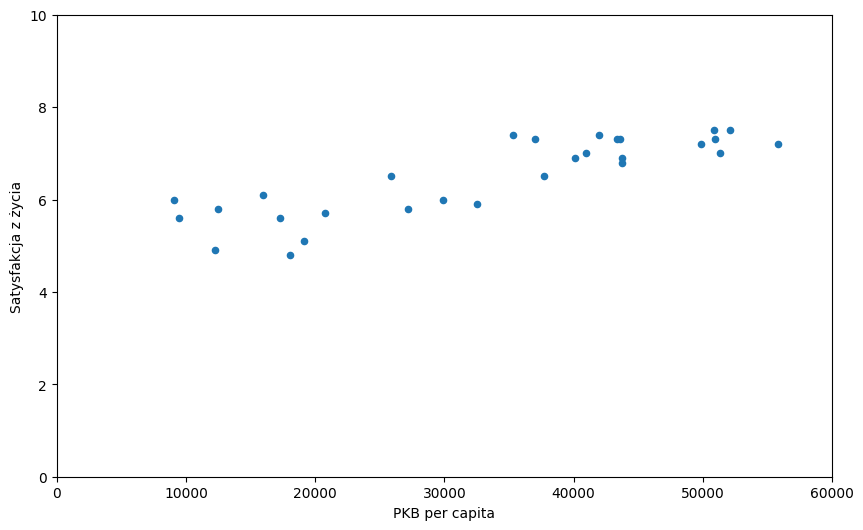

In [27]:
# Wizualizuje dane

sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.axis([0, 60000, 0, 10])
plt.show()

In [28]:
# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

In [29]:
# Uczy dane
model.fit(X, y)

LinearRegression()

In [30]:
# Oblicza prognozy dla Cypru
X_new = [[22587], [32655]]  # PKB per capita Cypru
print(model.predict(X_new))

[[5.96242338]
 [6.45691769]]


In [31]:
model.intercept_[0]

4.853052800266436

In [32]:
model.coef_[0][0]

4.911544589158484e-05

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


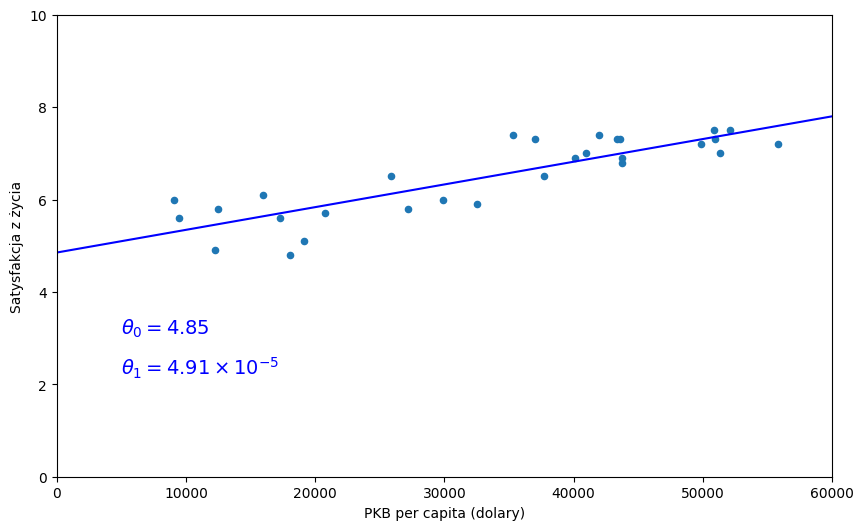

t1 =  4.911544589158484e-05
t0 =  4.853052800266436


In [33]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]  #współczynnik funkcji liniowej
t0, t1
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.xlabel("PKB per capita (dolary)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('r_1_19')
plt.show()
print("t1 = ", t1)
print("t0 = ", t0)

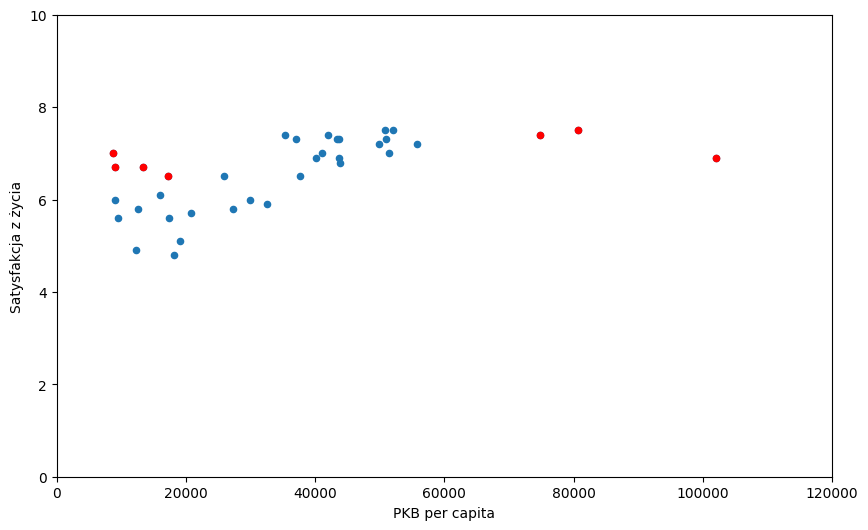

In [34]:
# Wizualizuje dane

ax = full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
missing_data.plot(ax=ax, kind='scatter', x="PKB per capita", y='Satysfakcja z życia', color="red" )
plt.axis([0, 120000, 0, 10])
plt.show()

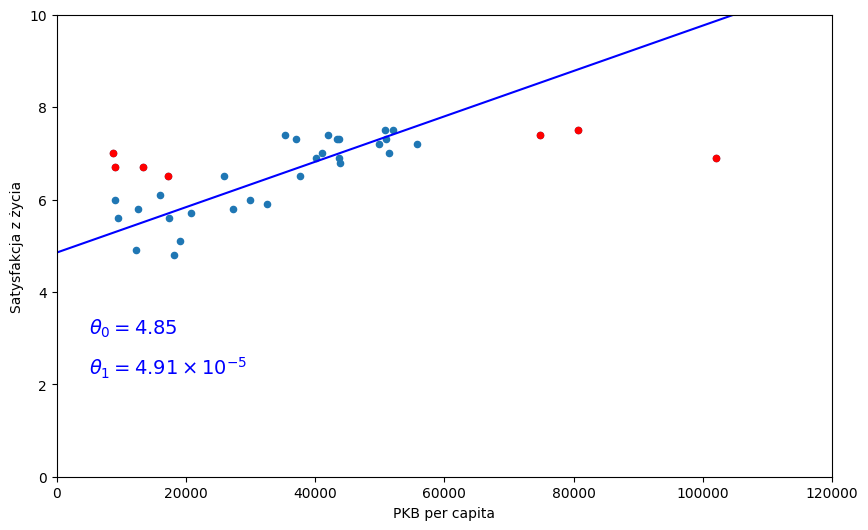

In [35]:
ax = full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
missing_data.plot(ax=ax, kind='scatter', x="PKB per capita", y='Satysfakcja z życia', color="red" )
plt.axis([0, 120000, 0, 10])

X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


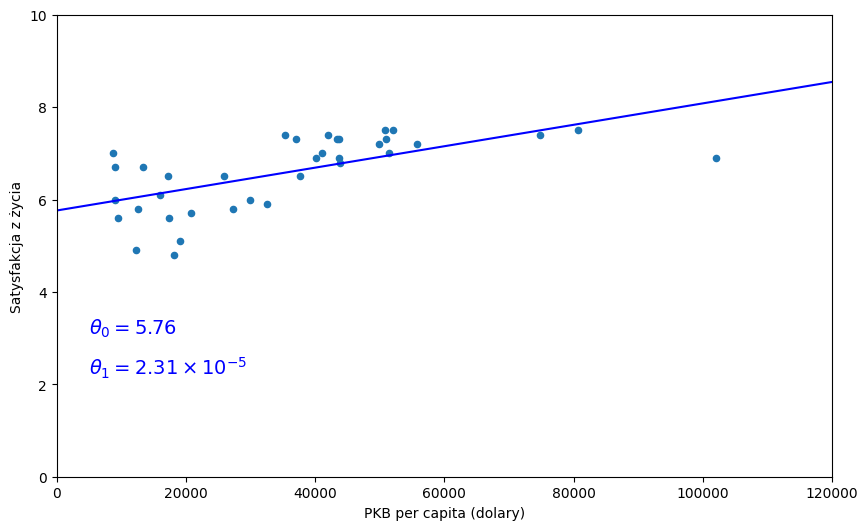

t1 =  2.3177337047396075e-05
t0 =  5.763029861307918


In [36]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[full_country_stats["PKB per capita"]]
ysample = np.c_[full_country_stats["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]  #współczynnik funkcji liniowej
t0, t1
full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(10,6))
plt.xlabel("PKB per capita (dolary)")
plt.axis([0, 120000, 0, 10])
X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.76$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 2.31 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('r_1_19')
plt.show()
print("t1 = ", t1)
print("t0 = ", t0)

In [37]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [40]:
def load_housing_data():
    return pd.read_csv("/gdrive/My Drive/housing.csv")

In [41]:
housing = load_housing_data()
housing.rename(columns={"longitude": "Dł. geograficzna", "latitude": "Szer. geograficzna", "housing_median_age": "Mediana wieku mieszkań",
                        "total_rooms": "Całk. liczba pokoi", "total_bedrooms": "Całk. liczba sypialni", "population": "Populacja",
                        "households": "Rodziny", "median_income": "Mediana dochodów", "median_house_value": "Mediana cen mieszkań",
                        "ocean_proximity": "Odległość do oceanu"}, inplace=True)
housing.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dł. geograficzna        20640 non-null  float64
 1   Szer. geograficzna      20640 non-null  float64
 2   Mediana wieku mieszkań  20640 non-null  float64
 3   Całk. liczba pokoi      20640 non-null  float64
 4   Całk. liczba sypialni   20433 non-null  float64
 5   Populacja               20640 non-null  float64
 6   Rodziny                 20640 non-null  float64
 7   Mediana dochodów        20640 non-null  float64
 8   Mediana cen mieszkań    20640 non-null  float64
 9   Odległość do oceanu     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
housing["Odległość do oceanu"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: Odległość do oceanu, dtype: int64

In [44]:
housing.describe() # zapamiętać tę metodę

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


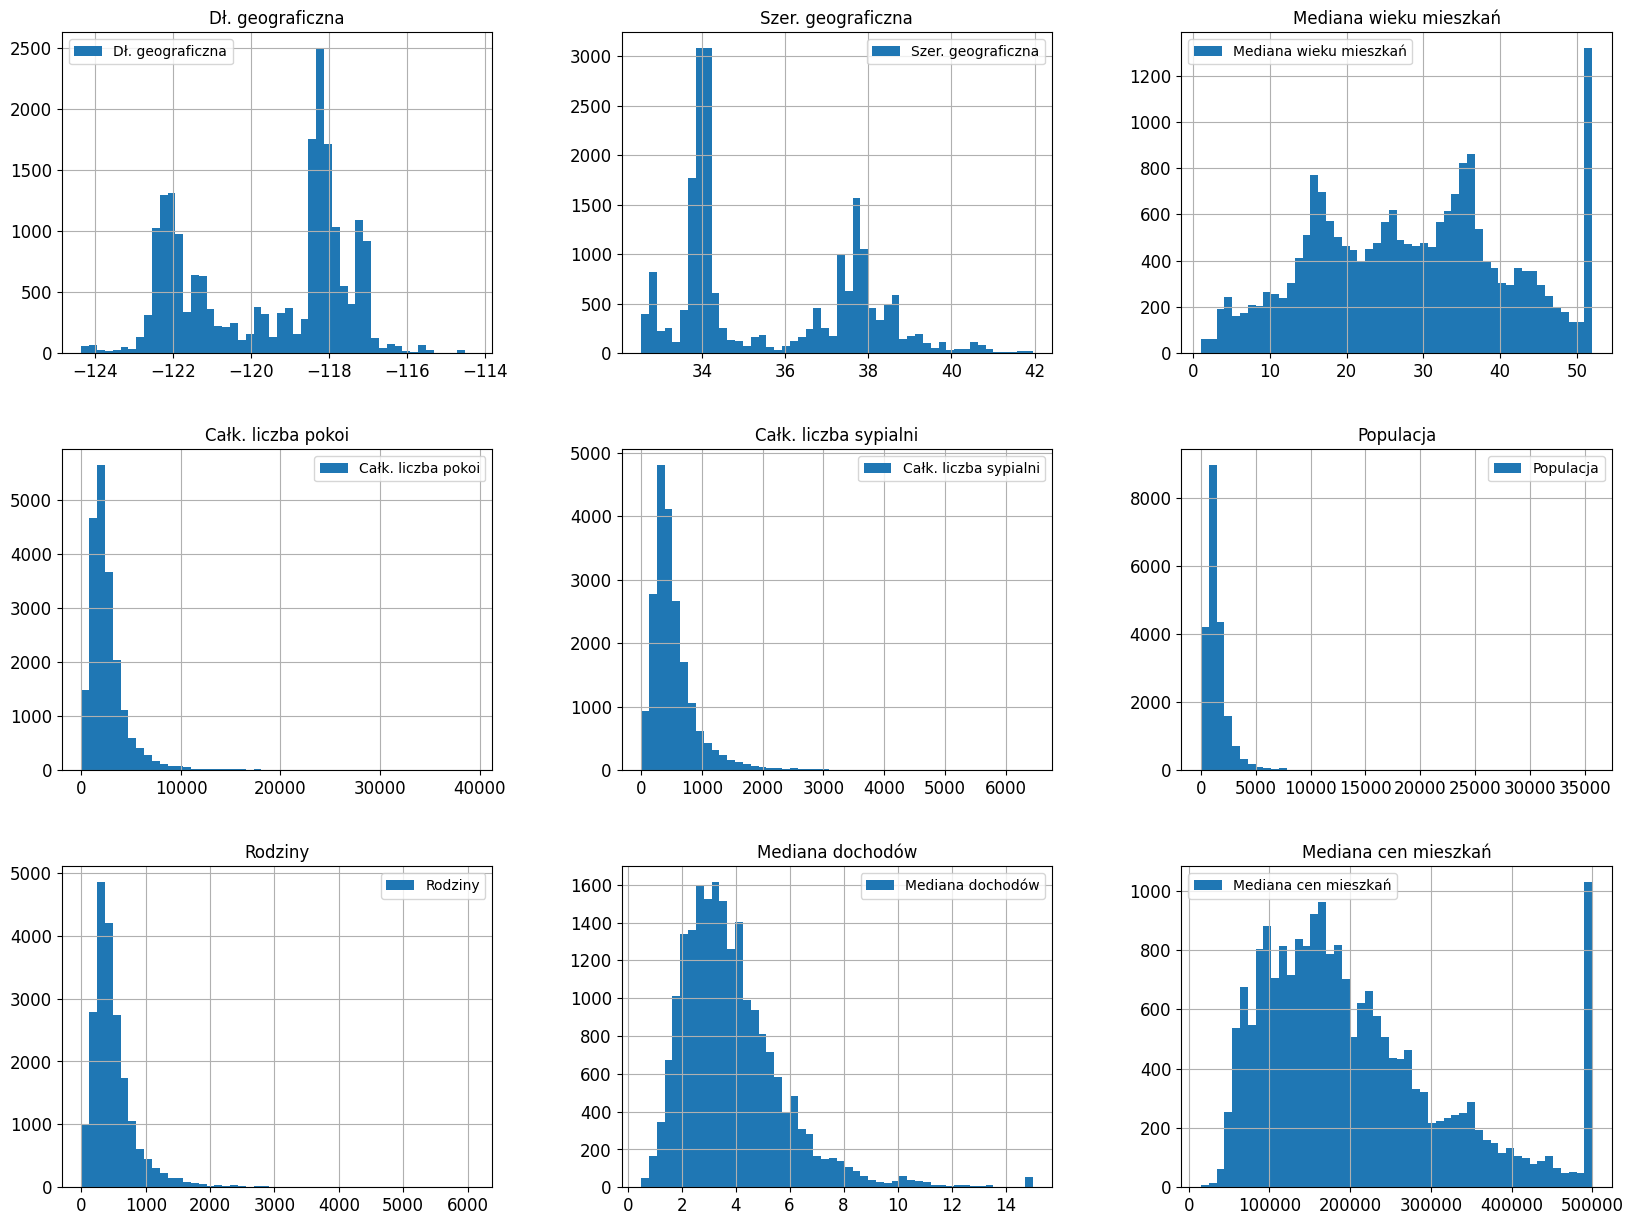

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15), legend=True)
plt.show()

In [46]:
# w celu zapewnienia powtarzalności wyników przy każdym uruchomieniu notatniku
np.random.seed(42)

In [47]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [48]:
test_set.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

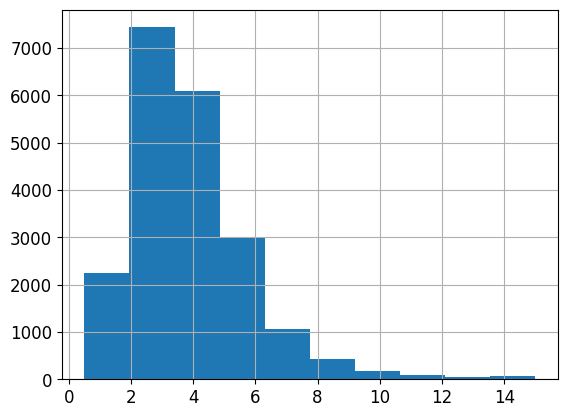

In [49]:
housing["Mediana dochodów"].hist()

In [50]:
housing["kat_dochodów"] = pd.cut(housing["Mediana dochodów"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # zwykły split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # stratified split
for train_index, test_index in split.split(housing, housing["kat_dochodów"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [52]:
strat_test_set["kat_dochodów"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: kat_dochodów, dtype: float64

In [53]:
test_set["kat_dochodów"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: kat_dochodów, dtype: float64

In [54]:
def income_cat_proportions(data):
    return data["kat_dochodów"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(housing),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [55]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("kat_dochodów", axis=1, inplace=True)

In [56]:
strat_test_set.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Mediana cen mieszkań,Odległość do oceanu
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [57]:
housing = strat_train_set.copy() # analizujemy dane treningowe

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Dł. geograficzna', ylabel='Szer. geograficzna'>

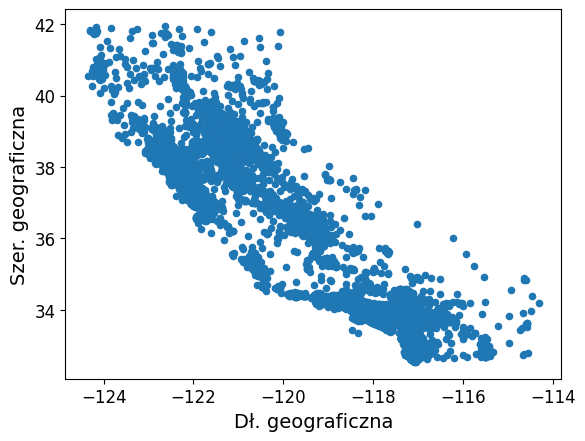

In [58]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna")

<Axes: xlabel='Dł. geograficzna', ylabel='Szer. geograficzna'>

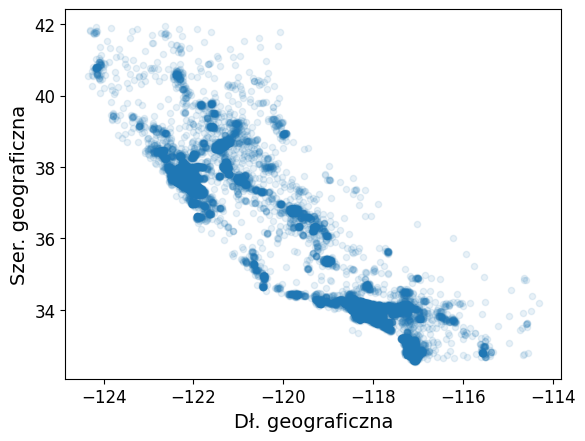

In [59]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna", alpha=0.1)

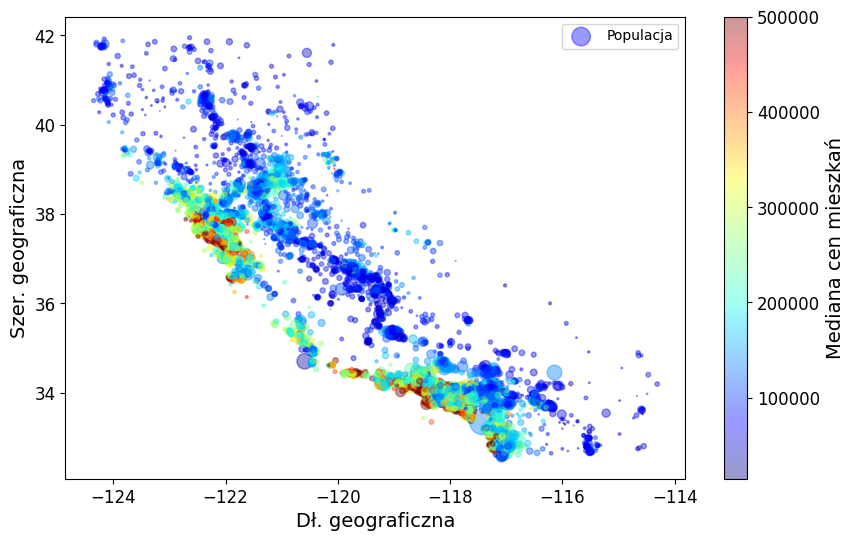

In [60]:
housing.plot(kind="scatter", x="Dł. geograficzna", y="Szer. geograficzna", alpha=0.4,
    s=housing["Populacja"]/100, label="Populacja", figsize=(10,6),
    c="Mediana cen mieszkań", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [61]:
corr_matrix = housing.corr()

In [62]:
corr_matrix["Mediana cen mieszkań"].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687151
Całk. liczba pokoi        0.135140
Mediana wieku mieszkań    0.114146
Rodziny                   0.064590
Całk. liczba sypialni     0.047781
Populacja                -0.026882
Dł. geograficzna         -0.047466
Szer. geograficzna       -0.142673
Name: Mediana cen mieszkań, dtype: float64

array([[<Axes: xlabel='Mediana cen mieszkań', ylabel='Mediana cen mieszkań'>,
        <Axes: xlabel='Mediana dochodów', ylabel='Mediana cen mieszkań'>,
        <Axes: xlabel='Całk. liczba pokoi', ylabel='Mediana cen mieszkań'>,
        <Axes: xlabel='Mediana wieku mieszkań', ylabel='Mediana cen mieszkań'>],
       [<Axes: xlabel='Mediana cen mieszkań', ylabel='Mediana dochodów'>,
        <Axes: xlabel='Mediana dochodów', ylabel='Mediana dochodów'>,
        <Axes: xlabel='Całk. liczba pokoi', ylabel='Mediana dochodów'>,
        <Axes: xlabel='Mediana wieku mieszkań', ylabel='Mediana dochodów'>],
       [<Axes: xlabel='Mediana cen mieszkań', ylabel='Całk. liczba pokoi'>,
        <Axes: xlabel='Mediana dochodów', ylabel='Całk. liczba pokoi'>,
        <Axes: xlabel='Całk. liczba pokoi', ylabel='Całk. liczba pokoi'>,
        <Axes: xlabel='Mediana wieku mieszkań', ylabel='Całk. liczba pokoi'>],
       [<Axes: xlabel='Mediana cen mieszkań', ylabel='Mediana wieku mieszkań'>,
        <Axes: xl

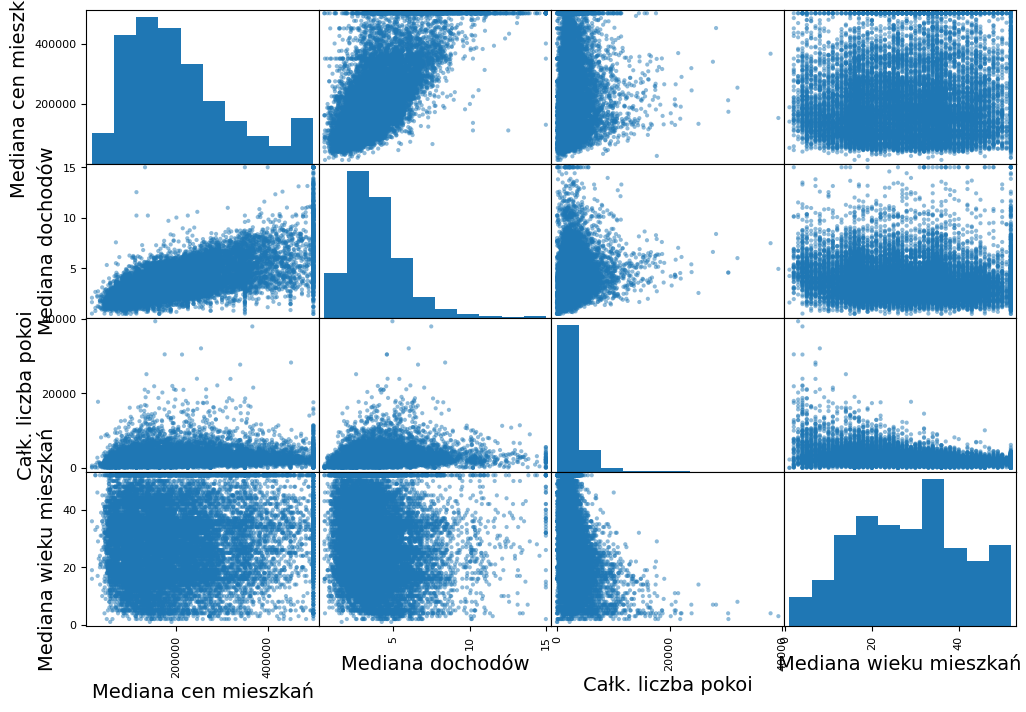

In [63]:
from pandas.plotting import scatter_matrix

attributes = ["Mediana cen mieszkań", "Mediana dochodów", "Całk. liczba pokoi",
              "Mediana wieku mieszkań"]
scatter_matrix(housing[attributes], figsize=(12, 8))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(0.0, 16.0, 0.0, 550000.0)

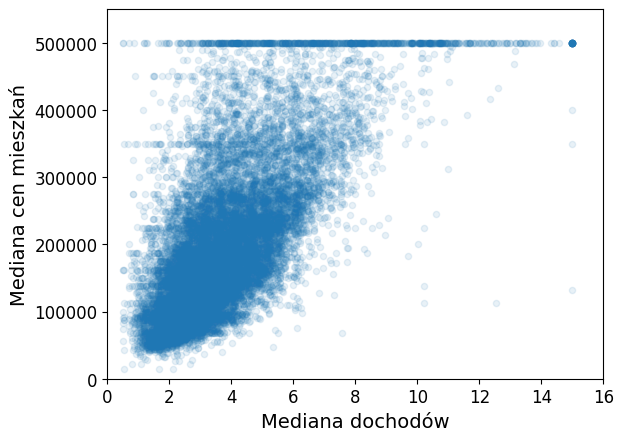

In [64]:
housing.plot(kind="scatter", x="Mediana dochodów", y="Mediana cen mieszkań",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [65]:
housing["Pokoje_na_rodzinę"] = housing["Całk. liczba pokoi"]/housing["Rodziny"]
housing["Sypialnie_na_pokoje"] = housing["Całk. liczba sypialni"]/housing["Całk. liczba pokoi"]
housing["Populacja_na_rodzinę"]=housing["Populacja"]/housing["Rodziny"]

In [66]:
corr_matrix = housing.corr()
corr_matrix["Mediana cen mieszkań"].sort_values(ascending=False)

Mediana cen mieszkań      1.000000
Mediana dochodów          0.687151
Pokoje_na_rodzinę         0.146255
Całk. liczba pokoi        0.135140
Mediana wieku mieszkań    0.114146
Rodziny                   0.064590
Całk. liczba sypialni     0.047781
Populacja_na_rodzinę     -0.021991
Populacja                -0.026882
Dł. geograficzna         -0.047466
Szer. geograficzna       -0.142673
Sypialnie_na_pokoje      -0.259952
Name: Mediana cen mieszkań, dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


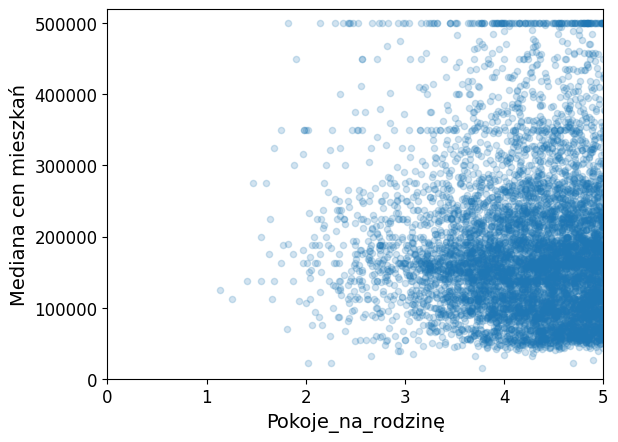

In [67]:
housing.plot(kind="scatter", x="Pokoje_na_rodzinę", y="Mediana cen mieszkań",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [68]:
housing_labels = strat_train_set["Mediana cen mieszkań"].copy()
housing = strat_train_set.drop("Mediana cen mieszkań", axis=1) # usuwa etykiety w zbiorze uczącym

In [69]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: Mediana cen mieszkań, dtype: float64

In [70]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows.shape

(5, 9)

In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [77]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [78]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [79]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [80]:
X = imputer.transform(housing_num)

In [76]:
#Usuwamy atrybut tekstowy, ponieważ mediana może być obliczana wyłącznie wobec atrybutów numerycznych:
housing_num = housing.drop('Odległość do oceanu', axis=1)
# ewentualnie: housing_num = housing.select_dtypes(include=[np.number])

In [81]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [82]:
housing_tr.loc[sample_incomplete_rows.index.values]

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [83]:
#Przetwórzmy wstępnie wartości cechy kategorycznej Odległość do oceanu:
housing_cat = housing[["Odległość do oceanu"]]
housing_cat.head(10)

,Odległość do oceanu
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [84]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

# indeks kolumny
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
#Kod ten dodaje nowe informacje (atrybuty) do istniejącego zbioru danych dotyczącego mieszkań. 
#Zadaniem tego kodu jest obliczenie trzech nowych atrybutów dla każdego domu:

#- Liczba pokojów na gospodarstwo domowe (ile pokojów przypada na jedno gospodarstwo domowe).
# - Liczba osób na gospodarstwo domowe (ile osób mieszka w jednym gospodarstwie domowym).
# -Stosunek liczby sypialni do liczby pokojów (ile sypialni przypada na jedno pomieszczenie w domu).
# Kod tworzy specjalną klasę (CombinedAttributesAdder), która oblicza te nowe atrybuty. 
#Następnie używa tej klasy do obliczenia nowych atrybutów dla wszystkich domów w zbiorze danych.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [88]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["Pokoje_na_rodzinę", "Populacja_na_rodzinę", "Sypialnie_na_pokoje"],
    index=housing.index)
housing_extra_attribs.head()

,Dł. geograficzna,Szer. geograficzna,Mediana wieku mieszkań,Całk. liczba pokoi,Całk. liczba sypialni,Populacja,Rodziny,Mediana dochodów,Odległość do oceanu,Pokoje_na_rodzinę,Populacja_na_rodzinę,Sypialnie_na_pokoje
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555,0.205784
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698,0.160714
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333,0.191595
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213,0.276505
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241,0.182692


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # opcjonalne
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [90]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["Odległość do oceanu"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [92]:
# Przetestujmy pełen pipeline na kilku przykładach uczących
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [93]:
print("Wartosci:", list(some_labels))

Wartosci: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [94]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [95]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915803

In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=5)
scores

array([0.65072257, 0.65162332, 0.6381072 , 0.62158966, 0.6553829 ])

In [97]:
scores.mean()

0.6434851308862198

In [98]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, min_impurity_decrease=0.8)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(min_impurity_decrease=0.8, random_state=42)

In [99]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6.626307803442639

In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=5)
scores

array([0.63538997, 0.61665583, 0.63889687, 0.59030295, 0.62556688])

In [101]:
scores.mean()

0.6213624995912763

In [102]:
housing_test_labels = strat_test_set["Mediana cen mieszkań"].copy()
housing_test = strat_test_set.drop("Mediana cen mieszkań", axis=1) # usuwa etykiety w zbiorze testowym

In [103]:
housing_test_prepared = full_pipeline.transform(housing_test)

In [104]:
housing_predictions = lin_reg.predict(housing_test_prepared)
lin_mse = mean_squared_error(housing_test_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66913.4419132093

In [105]:
housing_predictions = tree_reg.predict(housing_test_prepared)
tree_mse = mean_squared_error(housing_test_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69870.61426153759

In [106]:
import xgboost

In [107]:
xgb_regressor = xgboost.XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bylevel=0.8)

In [108]:
xgb_regressor.fit(housing_prepared, housing_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [109]:
scores = cross_val_score(xgb_regressor, housing_prepared, housing_labels, cv=5, n_jobs=-1)
scores

array([0.83694322, 0.85130195, 0.8498633 , 0.83963164, 0.83881972])

In [110]:
housing_predictions = xgb_regressor.predict(housing_test_prepared)
xgb_mse = mean_squared_error(housing_test_labels, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

43861.18461265509

Kroki:
Wczytanie danych
Analiza danych: wstępna analiza, opis statystyczny, korelacja zmiennych
Wizualizacja danych: histogramy, wykresy kolumnowe, wykresy skrzypcowe, macierz korelacji
Imputowanie brakujących wartości: uzupełnienie wartości brakujących za pomocą metody mediany
Przygotowanie danych do modelowania: przekształcenie zmiennych kategorycznych za pomocą kodowania one-hot, podział danych na zbiór treningowy i testowy
Budowanie modelu uczenia maszynowego: zastosowanie algorytmu Random Forest w celu przewidzenia narodowości zwycięzców
Ocenianie modelu: obliczenie dokładności modelu na zbiorze testowym

In [111]:
df=pd. read_csv('https://public.tableau.com/s/sites/default/files/media/wimbledons_champions.csv')

In [112]:
df.head()

,Gender,Champion,Mins,Runner-up Nationality,Champion Nationality,Runner-up,Score,Runner-up Seed,Champion Seed,Year,Runner-up Nationality (Men's),Runner-Up
0,Men's,G.L. Patterson,NaN,AUS,AUS,N.E. Brookes,"6-3, 7-5, 6-2",NaN,NaN,1919,NaN,NaN
1,Men's,G.L. Patterson,NaN,GBR,AUS,R. Lycett,"6-3, 6-4, 6-2",NaN,NaN,1922,NaN,NaN
2,Men's,N.E. Brookes,NaN,GBR,AUS,A.W. Gore,"6-4, 6-2, 6-2",NaN,NaN,1907,NaN,NaN
3,Men's,N.E. Brookes,NaN,NZL,AUS,A.F. Wilding,"6-4, 6-4, 7-5",NaN,NaN,1914,NaN,NaN
4,Men's,J.R. Borotra,80.0,FRA,FRA,J.R. Lacoste,"6-1, 3-6, 6-1, 3-6, 6-4",NaN,NaN,1924,NaN,NaN


In [113]:
df.describe()

,Mins,Champion Seed,Year
count,188.000000,165.000000,253.000000
mean,100.297872,2.672727,1949.478261
std,48.548301,3.048718,40.661452
min,23.000000,1.000000,1877.000000
25%,65.000000,1.000000,1912.000000
50%,89.500000,2.000000,1953.000000
75%,122.000000,3.000000,1985.000000
max,288.000000,23.000000,2016.000000


In [114]:
import seaborn as sns

array([[<Axes: title={'center': 'Mins'}>,
        <Axes: title={'center': 'Champion Seed'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

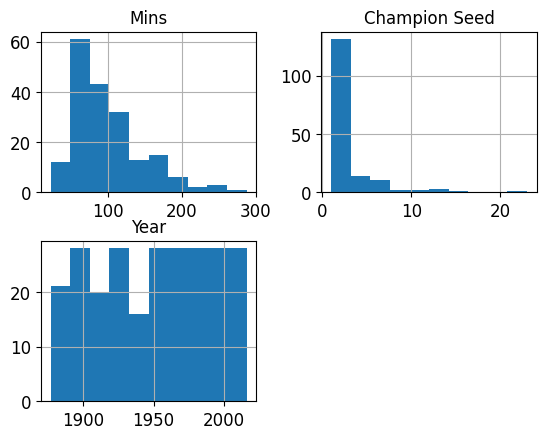

In [116]:
df.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'AUS'),
  Text(1, 0, 'FRA'),
  Text(2, 0, 'GBR'),
  Text(3, 0, 'NZL'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'SRB'),
  Text(6, 0, 'SUI'),
  Text(7, 0, 'SWE'),
  Text(8, 0, 'CZE'),
  Text(9, 0, 'ESP'),
  Text(10, 0, 'GER'),
  Text(11, 0, 'NED'),
  Text(12, 0, 'CRO'),
  Text(13, 0, 'BRA'),
  Text(14, 0, 'RUS')])

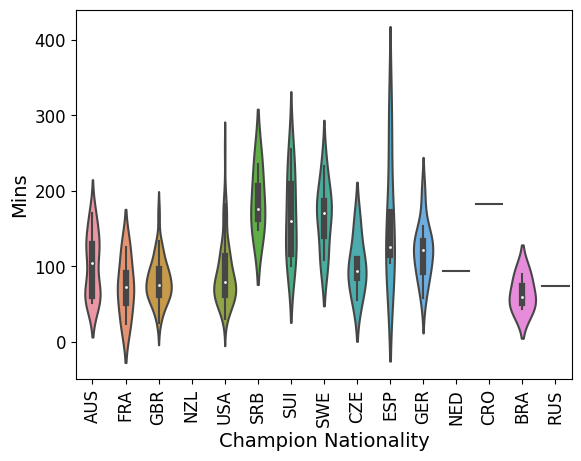

In [123]:
sns.violinplot(df, x='Champion Nationality', y='Mins')
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='count'>

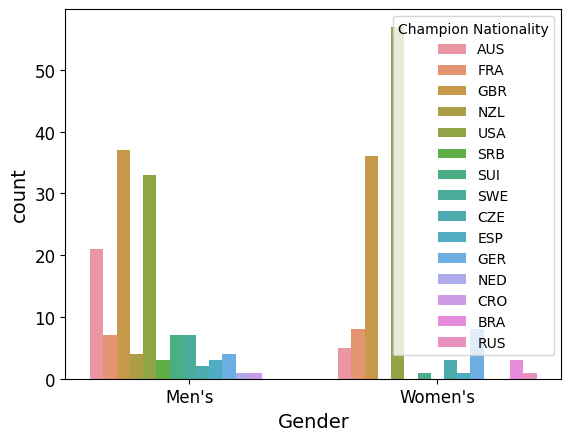

In [124]:
sns.countplot(df, x='Gender', hue='Champion Nationality')

<Axes: >

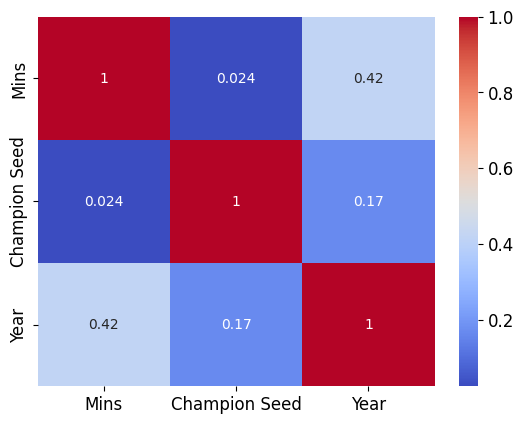

In [129]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [131]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df

,Gender,Champion,Mins,Runner-up Nationality,Champion Nationality,Runner-up,Score,Runner-up Seed,Champion Seed,Year,Runner-up Nationality (Men's),Runner-Up
0,Men's,G.L. Patterson,NaN,AUS,AUS,N.E. Brookes,"6-3, 7-5, 6-2",NaN,NaN,1919,NaN,NaN
1,Men's,G.L. Patterson,NaN,GBR,AUS,R. Lycett,"6-3, 6-4, 6-2",NaN,NaN,1922,NaN,NaN
2,Men's,N.E. Brookes,NaN,GBR,AUS,A.W. Gore,"6-4, 6-2, 6-2",NaN,NaN,1907,NaN,NaN
3,Men's,N.E. Brookes,NaN,NZL,AUS,A.F. Wilding,"6-4, 6-4, 7-5",NaN,NaN,1914,NaN,NaN
4,Men's,J.R. Borotra,80.0,FRA,FRA,J.R. Lacoste,"6-1, 3-6, 6-1, 3-6, 6-4",NaN,NaN,1924,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
248,Women's,V.E.S. Williams,84.0,NaN,USA,NaN,"6-3, 7-6 (7-3)",2,5.0,2000,USA,L.A. Davenport
249,Women's,S.J. Fry,50.0,NaN,USA,NaN,"6-3, 6-1,",6,5.0,1956,GBR,A. Buxton
250,Women's,S. Williams,122.0,NaN,USA,NaN,"6-1, 5-7, 6-2",3,6.0,2012,POL,A. Radwańska
251,Women's,V.E.S. Williams,111.0,NaN,USA,NaN,"7-5, 6-4",6,7.0,2008,USA,S.J. Williams


In [134]:
df['Mins']=imputer.fit_transform(df[['Mins']])
df

,Gender,Champion,Mins,Runner-up Nationality,Champion Nationality,Runner-up,Score,Runner-up Seed,Champion Seed,Year,Runner-up Nationality (Men's),Runner-Up
0,Men's,G.L. Patterson,89.5,AUS,AUS,N.E. Brookes,"6-3, 7-5, 6-2",NaN,NaN,1919,NaN,NaN
1,Men's,G.L. Patterson,89.5,GBR,AUS,R. Lycett,"6-3, 6-4, 6-2",NaN,NaN,1922,NaN,NaN
2,Men's,N.E. Brookes,89.5,GBR,AUS,A.W. Gore,"6-4, 6-2, 6-2",NaN,NaN,1907,NaN,NaN
3,Men's,N.E. Brookes,89.5,NZL,AUS,A.F. Wilding,"6-4, 6-4, 7-5",NaN,NaN,1914,NaN,NaN
4,Men's,J.R. Borotra,80.0,FRA,FRA,J.R. Lacoste,"6-1, 3-6, 6-1, 3-6, 6-4",NaN,NaN,1924,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
248,Women's,V.E.S. Williams,84.0,NaN,USA,NaN,"6-3, 7-6 (7-3)",2,5.0,2000,USA,L.A. Davenport
249,Women's,S.J. Fry,50.0,NaN,USA,NaN,"6-3, 6-1,",6,5.0,1956,GBR,A. Buxton
250,Women's,S. Williams,122.0,NaN,USA,NaN,"6-1, 5-7, 6-2",3,6.0,2012,POL,A. Radwańska
251,Women's,V.E.S. Williams,111.0,NaN,USA,NaN,"7-5, 6-4",6,7.0,2008,USA,S.J. Williams


In [135]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
cat_encoder = OneHotEncoder(sparse=False)
gender_cat=df[['Gender']]
gender_1hot = cat_encoder.fit_transform(gender_cat)
gender_1hot
df['Men']=gender_1hot[:,0]
df['Women'] = gender_1hot[:,1]
df

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender,Champion,Mins,Runner-up Nationality,Champion Nationality,Runner-up,Score,Runner-up Seed,Champion Seed,Year,Runner-up Nationality (Men's),Runner-Up,Men,Women
0,Men's,G.L. Patterson,89.5,AUS,AUS,N.E. Brookes,"6-3, 7-5, 6-2",NaN,NaN,1919,NaN,NaN,1.0,0.0
1,Men's,G.L. Patterson,89.5,GBR,AUS,R. Lycett,"6-3, 6-4, 6-2",NaN,NaN,1922,NaN,NaN,1.0,0.0
2,Men's,N.E. Brookes,89.5,GBR,AUS,A.W. Gore,"6-4, 6-2, 6-2",NaN,NaN,1907,NaN,NaN,1.0,0.0
3,Men's,N.E. Brookes,89.5,NZL,AUS,A.F. Wilding,"6-4, 6-4, 7-5",NaN,NaN,1914,NaN,NaN,1.0,0.0
4,Men's,J.R. Borotra,80.0,FRA,FRA,J.R. Lacoste,"6-1, 3-6, 6-1, 3-6, 6-4",NaN,NaN,1924,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Women's,V.E.S. Williams,84.0,NaN,USA,NaN,"6-3, 7-6 (7-3)",2,5.0,2000,USA,L.A. Davenport,0.0,1.0
249,Women's,S.J. Fry,50.0,NaN,USA,NaN,"6-3, 6-1,",6,5.0,1956,GBR,A. Buxton,0.0,1.0
250,Women's,S. Williams,122.0,NaN,USA,NaN,"6-1, 5-7, 6-2",3,6.0,2012,POL,A. Radwańska,0.0,1.0
251,Women's,V.E.S. Williams,111.0,NaN,USA,NaN,"7-5, 6-4",6,7.0,2008,USA,S.J. Williams,0.0,1.0
